#### This notebook will focus on gender classification using data processing and machine learning models

*** Importing Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/gender_classification_v7.csv')

In [3]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


woww..already cleaned dataset :))

In [7]:
print(df['gender'].unique())

['Male' 'Female']


In [8]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [9]:
print(df['gender'].unique())

[1 0]


Text(0.5, 1.0, 'Gender Distribution')

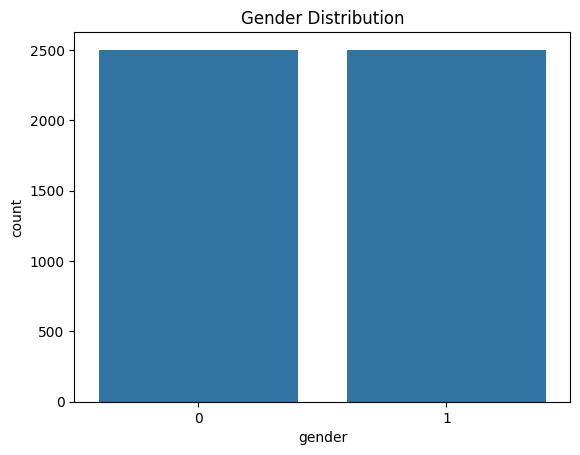

In [10]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Correlation Matrix')

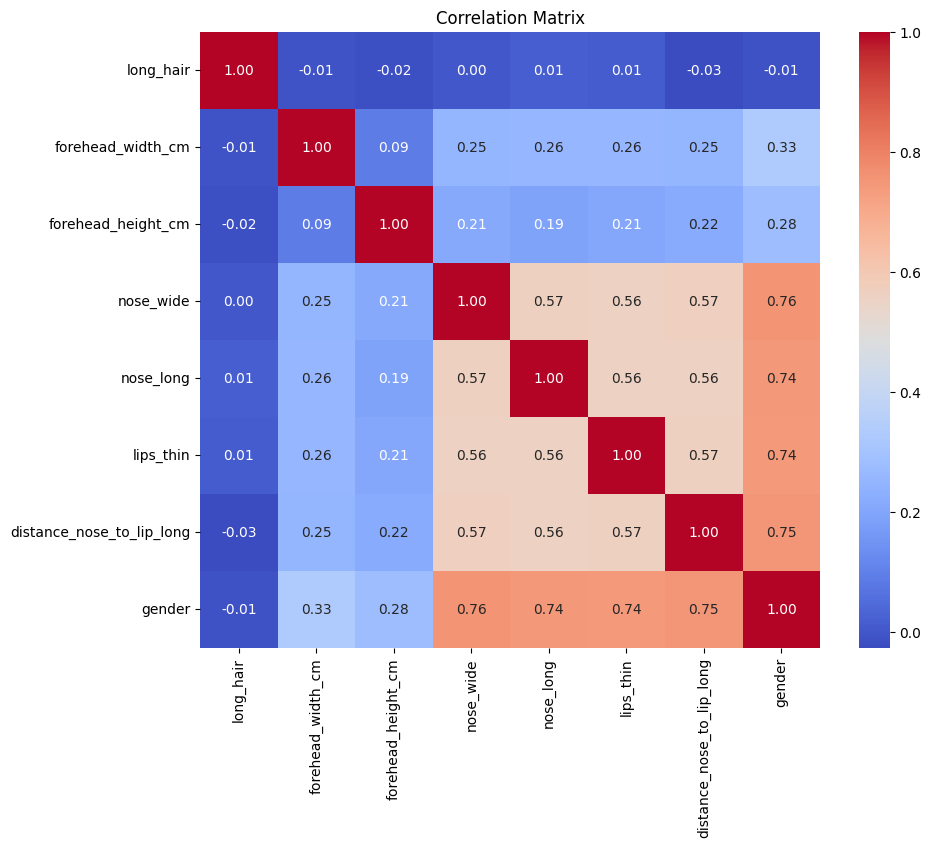

In [11]:
corr = df.corr()

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

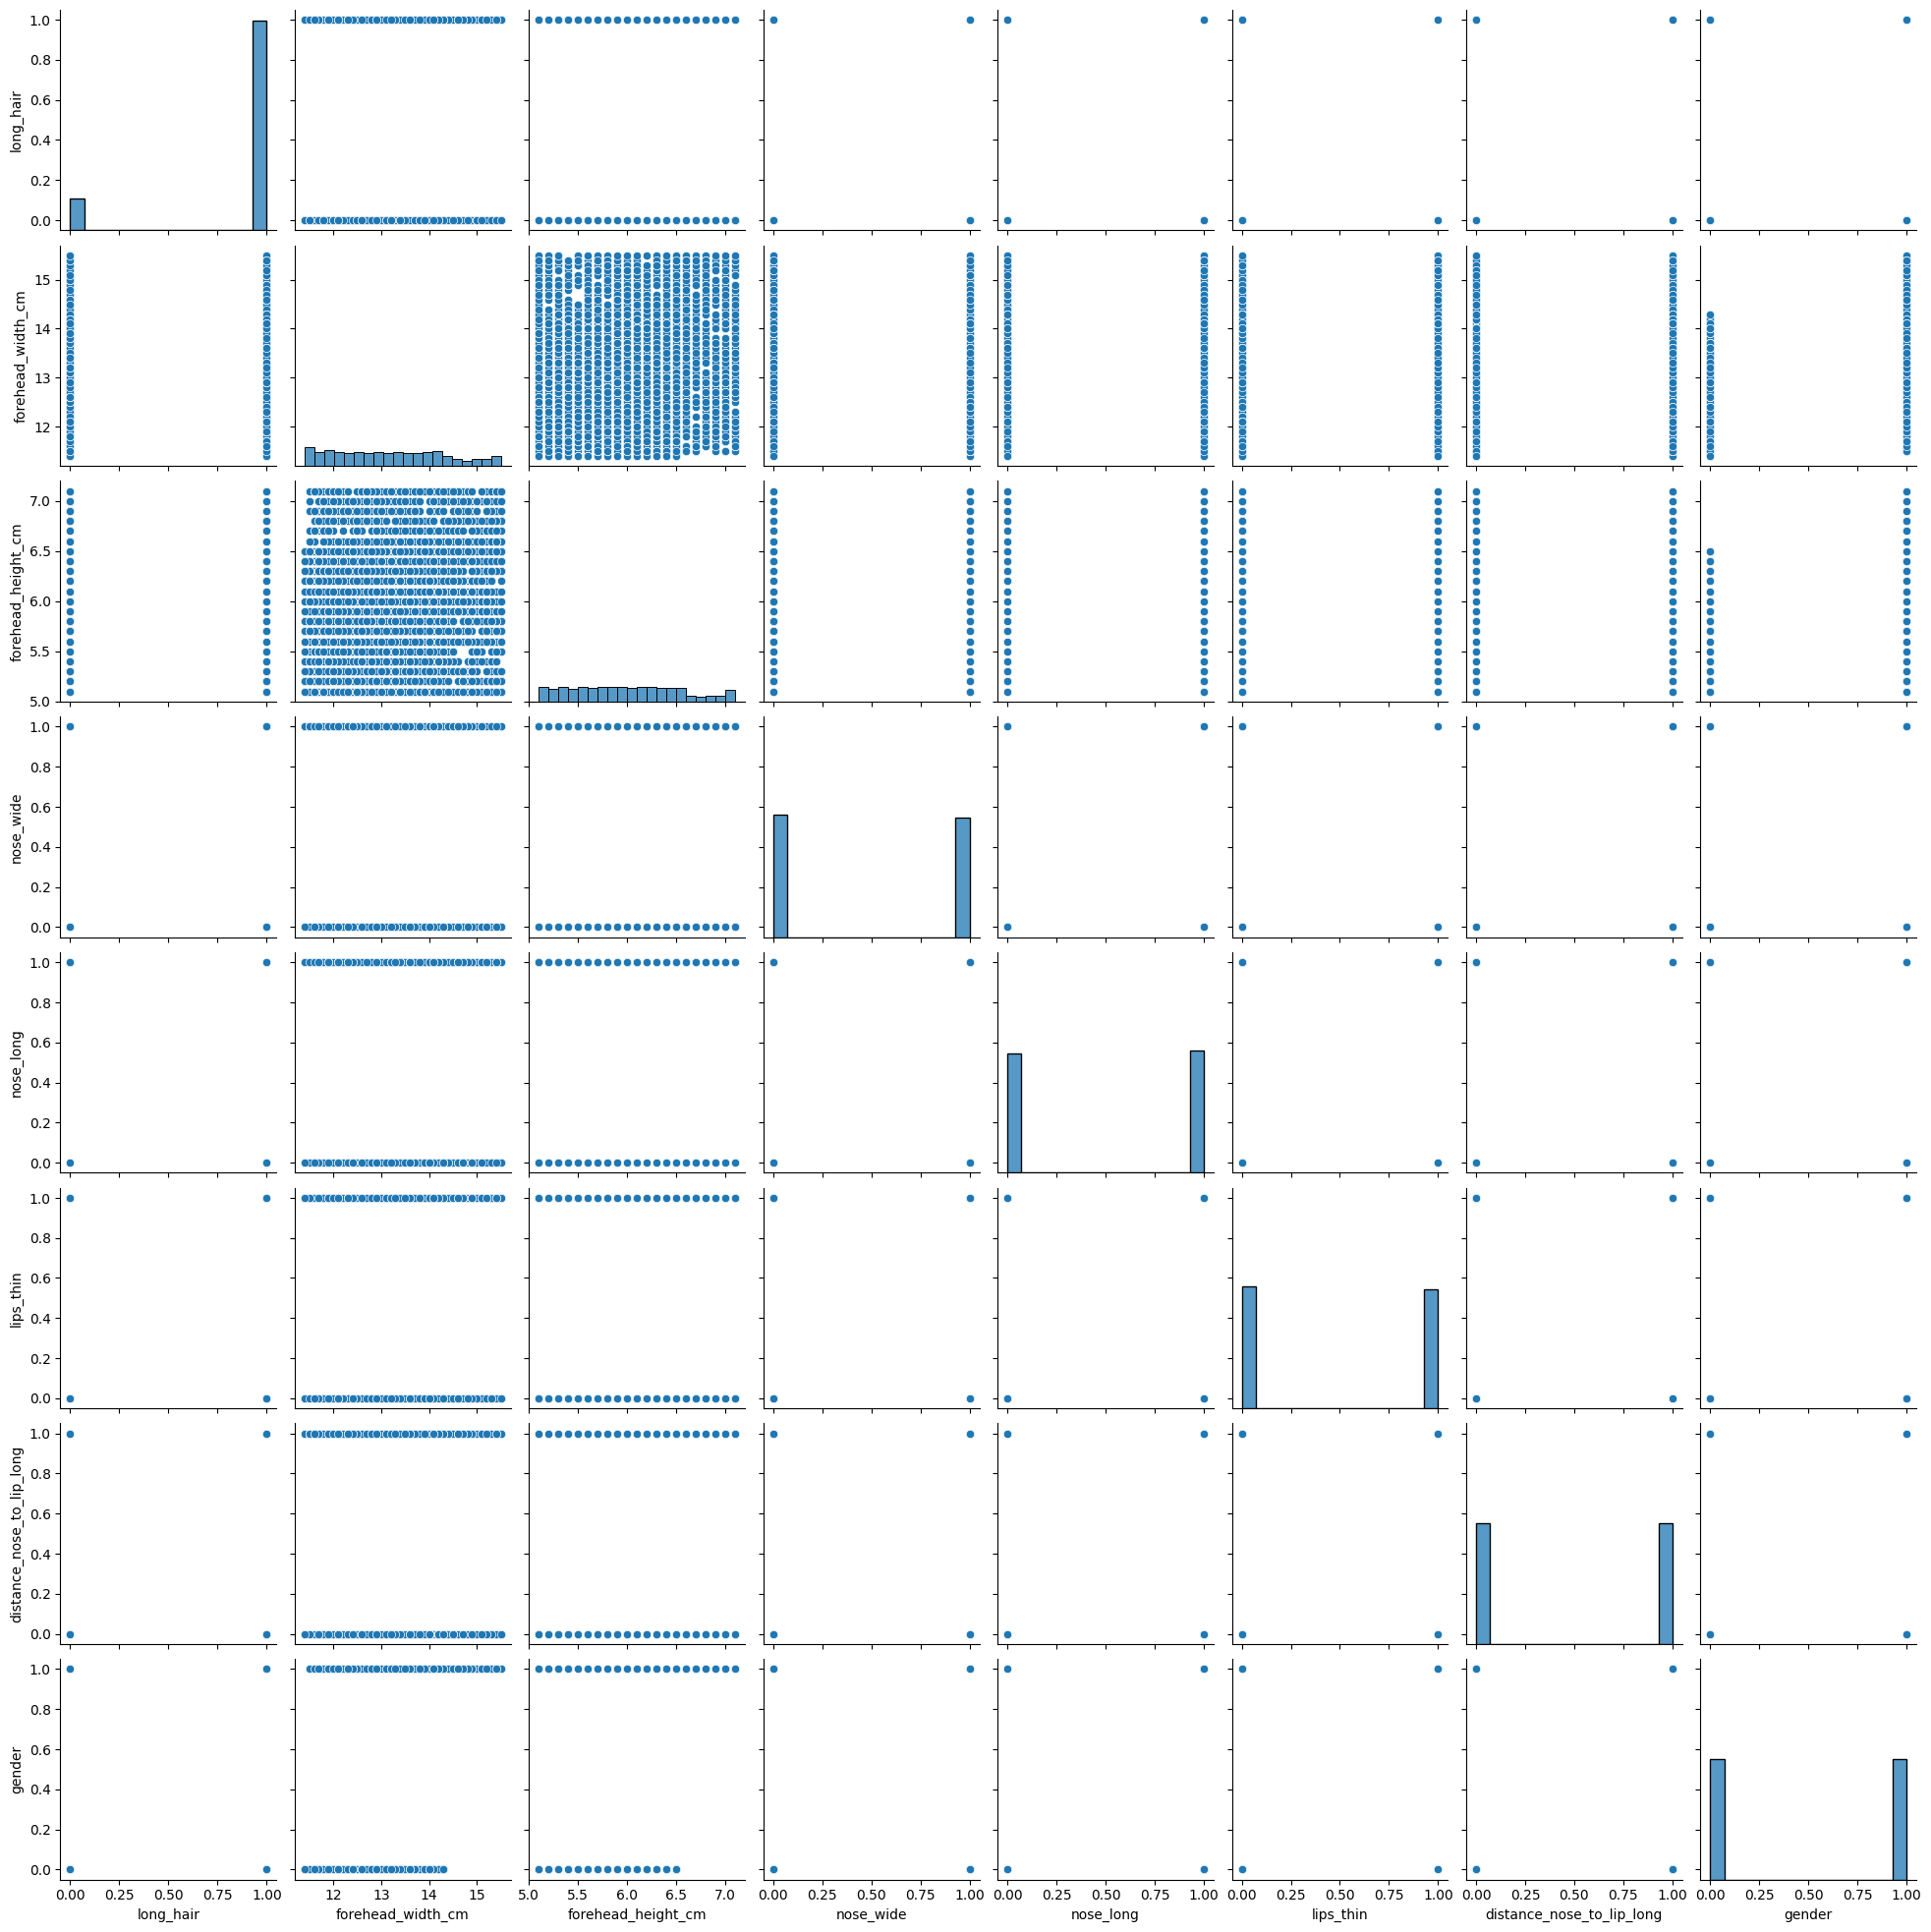

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
grouped_df = df.groupby('gender').mean()
print(grouped_df)

        long_hair  forehead_width_cm  forehead_height_cm  nose_wide  \
gender                                                                
0        0.873251          12.811675            5.796321   0.114754   
1        0.866000          13.551440            6.096360   0.873200   

        nose_long  lips_thin  distance_nose_to_lip_long  
gender                                                   
0        0.135946   0.121551                   0.121551  
1        0.880000   0.864800                   0.876400  


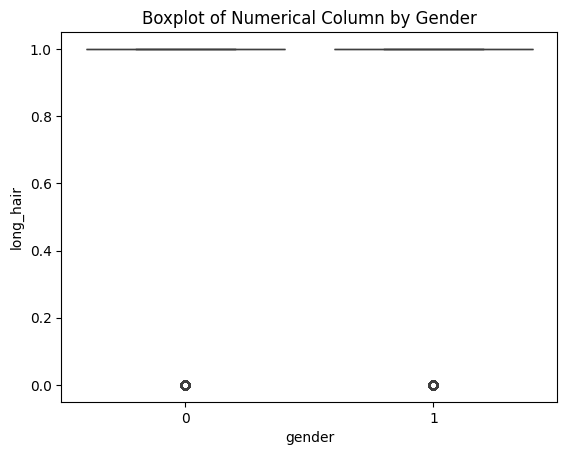

In [14]:
sns.boxplot(x='gender', y='long_hair', data=df)  # Replace 'numerical_column' with your actual column
plt.title('Boxplot of Numerical Column by Gender')
plt.show()

Using Linear Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
X = df.drop(columns=['gender'])
y = df['gender']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [21]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0419077506714738
R-squared: 0.8323674916343946


model is performing good

## **Using Classification Model as it will help in saving and evaluating**

#### Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [31]:
X = df.drop(columns=['gender'])  # Features
y = df['gender']  # Target variable

In [32]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [35]:
print(y)

[1 0 1 ... 0 0 1]


In [41]:
print(label_encoder.classes_)

[0 1]


In [34]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Train a logistic regression classifier
classifier = LogisticRegression()

In [37]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [38]:
from joblib import dump

# Save the trained model
dump(classifier, 'gender_classification_model.joblib')

['gender_classification_model.joblib']

testing model

In [39]:
from joblib import load
import pandas as pd

# Load the model
loaded_model = load('gender_classification_model.joblib')

# Create a DataFrame with proper feature names
X_test = pd.DataFrame([
    [1, 14.0, 12.5, 1, 1, 0, 5.5],  # Example 1
    [0, 13.5, 12.0, 0, 0, 1, 5.2],  # Example 2
], columns=['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
            'nose_long', 'lips_thin', 'distance_nose_to_lip_long'])

# Make predictions
predictions = loaded_model.predict(X_test)

# Convert numerical labels back to gender
predicted_labels = label_encoder.inverse_transform(predictions)

In [40]:
print(predicted_labels)

[1 1]


In [44]:
y_pred_train = (model.predict(X_train) > 0.5).astype(int)  # Convert probabilities to 0 or 1
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))

Training Accuracy: 0.96975


In [45]:
print("y_train dtype:", y_train.dtype)
print("y_pred_train dtype:", y_pred_train.dtype)

y_train dtype: int64
y_pred_train dtype: int64


## **Launching Gradio Interface**

In [47]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00


In [50]:
import gradio as gr
import joblib
import numpy as np

# Load the trained model
model = joblib.load("gender_classification_model.joblib")

# Function to predict gender
def predict_gender(long_hair, forehead_width_cm, forehead_height_cm, nose_wide, nose_long, lips_thin, distance_nose_to_lip_long):
    features = np.array([[long_hair, forehead_width_cm, forehead_height_cm, nose_wide, nose_long, lips_thin, distance_nose_to_lip_long]])
    prediction = model.predict(features)
    gender = "👦 Male" if prediction[0] == 1 else "👩 Female"
    return f"**Predicted Gender:** {gender}"

# Custom CSS for styling
custom_css = """
h1 {
    text-align: center;
    color: #4A90E2;
    font-size: 28px;
    font-weight: bold;
}
#component-0 {
    background: #f8f9fa;
    border-radius: 10px;
    padding: 20px;
}
button {
    background-color: #007bff !important;
    color: white !important;
    font-size: 16px !important;
    border-radius: 8px !important;
}
"""

# Gradio UI
with gr.Blocks(css=custom_css) as app:
    gr.HTML("<h1>🎭 AI Gender Prediction</h1>")
    gr.Markdown("### Enter facial features below to predict gender using AI.")

    with gr.Row():
        long_hair = gr.Radio([0, 1], label="Long Hair (0 = No, 1 = Yes)", interactive=True)
        forehead_width_cm = gr.Number(label="Forehead Width (cm)", interactive=True)

    with gr.Row():
        forehead_height_cm = gr.Number(label="Forehead Height (cm)", interactive=True)
        nose_wide = gr.Radio([0, 1], label="Nose Wide (0 = No, 1 = Yes)", interactive=True)

    with gr.Row():
        nose_long = gr.Radio([0, 1], label="Nose Long (0 = No, 1 = Yes)", interactive=True)
        lips_thin = gr.Radio([0, 1], label="Lips Thin (0 = No, 1 = Yes)", interactive=True)

    distance_nose_to_lip_long = gr.Number(label="Distance Nose to Lip (cm)", interactive=True)

    predict_button = gr.Button("🔍 Predict Gender")

    output = gr.Markdown(label="Prediction Result")

    predict_button.click(
        predict_gender,
        inputs=[long_hair, forehead_width_cm, forehead_height_cm, nose_wide, nose_long, lips_thin, distance_nose_to_lip_long],
        outputs=output
    )

In [51]:
# Launch the app
iface.launch()

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ffb5453e6a37f8e601.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
